<a href="https://colab.research.google.com/github/LucasJFaust/bibliotecas_py/blob/main/Rede_Neural_Case_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Enunciado do Desafio: Previsão de Churn com Redes Neurais
**Contexto:**

Em um mercado competitivo, reter clientes é tão crucial quanto adquiri-los. As empresas estão cada vez mais buscando entender os comportamentos e tendências que levam os clientes a deixar seus serviços. Neste contexto, o churn, ou a taxa de cancelamento de serviços por clientes, emerge como uma métrica vital a ser monitorada e minimizada. Prever o churn não só ajuda a identificar clientes em risco, mas também permite a implementação de estratégias proativas para reter esses clientes.

**Objetivo:**

Seu desafio é construir um modelo preditivo utilizando redes neurais que seja capaz de prever o churn de clientes com base em dados históricos. Este modelo ajudará a empresa a identificar os clientes que têm maior probabilidade de cancelar seus serviços, permitindo que medidas preventivas sejam tomadas para aumentar a retenção de clientes.

**Dataset:**

O dataset fornecido contém informações sobre os clientes de uma empresa, incluindo dados demográficos, informações de serviços utilizados, histórico de pagamentos, entre outros. A variável alvo é Churn, indicando se o cliente cancelou ou não o serviço.

**Variáveis:**

customerID: Identificação única do cliente
tenure: Número de meses que o cliente permaneceu com a empresa
PhoneService: Indica se o cliente tem serviço telefônico (Sim/Não)
Contract: Tipo de contrato do cliente (Mensal, Anual, Bienal)
PaperlessBilling: Se o cliente prefere faturamento sem papel (Sim/Não)
PaymentMethod: Método de pagamento do cliente
MonthlyCharges: Cobranças mensais em dólares
TotalCharges: Cobranças totais em dólares
Churn: Se o cliente cancelou o serviço (Sim/Não)

**Tarefas:**

Exploração e pré-processamento dos dados: Analise e prepare os dados para modelagem, tratando valores ausentes, normalizando variáveis numéricas e codificando variáveis categóricas conforme necessário.
Construção do modelo: Utilize uma rede neural, configurando suas camadas, neurônios e função de ativação. A ativação Logistic deve ser usada na camada de saída para análise da saída de acurácia.
Treinamento e avaliação do modelo: Treine o modelo com os dados processados e avalie seu desempenho utilizando as métricas de acurácia, precisão, recall e F1 Score.
Interpretação dos resultados: Analise o desempenho do modelo e discuta insights que podem ser obtidos a partir das previsões do modelo.

**Entrega:**

Documente todo o processo de análise, desde a exploração de dados até a avaliação do modelo, em um notebook no colab.

**Considerações:**

Através da análise das variáveis e do dicionário, algums informações relevantes:


#Variáveis categóricas:
Personal Loan (Empréstimo Pessoal) - Este cliente aceitou o empréstimo pessoal oferecido na última campanha? Esta é a nossa variável alvo
Securities Account (Conta de títulos) - O cliente possui conta de títulos no banco?
CD Account (Conta de CD) - O cliente tem uma conta de certificado de depósito (CD) no banco?
Online - O cliente usa serviços de banco pela Internet?
Credit Card - (Cartão de crédito) - O cliente usa um cartão de crédito emitido pelo UniversalBank?

# Variáveis contínuas:

Age (Idade) Idade do cliente
Experience (Experiência) - anos de experiência
Income (Renda) - Renda anual em dólares
CCAvg (CCAvg) - gasto médio com cartão de crédito
Mortage (Hipoteca) - Valor da hipoteca da casa

#Variáveis ​​categóricas ordinais:
Family (Família) - tamanho da família do cliente
Education (Educação) - nível de educação do cliente


A variável ID não adiciona nenhuma informação interessante.
Não há associação entre o ID de cliente de uma pessoa e o empréstimo, também não fornece nenhuma conclusão geral para futuros clientes de empréstimo em potencial.
Podemos desconsiderar essas informações para o modelo.
Zip code também pode ser desconsiderada, uma vez que a informação de distnância entre zip code pode não ser realidade


# 1. Carregamento e Inspeção dos Dados

Aqui, estamos utilizando a biblioteca pandas, que é uma ferramenta poderosa e flexível para análise de dados em Python. Começamos importando o dataset de churn com a função read_csv (ou read_excel, se for o caso). Em seguida, utilizamos df.head() para imprimir as primeiras linhas do dataframe e ter uma visão preliminar dos dados com os quais vamos trabalhar.

Este passo é crucial para começar a entender a estrutura dos dados, os tipos de variáveis que temos (numéricas, categóricas) e para identificar se há alguma inconsistência óbvia que precisaremos tratar.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

# Carregando os dados
df = pd.read_excel('/content/churn.xlsx')

# Exibindo as primeiras linhas para inspeção
df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 2. Análise Exploratória de Dados e Visualização

Agora estamos adentrando na fase de análise exploratória de dados, que é fundamental para entender as tendências e padrões nos dados. Neste passo, estamos usando matplotlib e seaborn para criar visualizações que nos ajudarão a interpretar melhor os dados.

Vamos excluir a coluna de costumerID já que ele não tem relevância para a nossa análise.

Começamos com a distribuição das cobranças mensais (MonthlyCharges), visualizando como esses valores estão distribuídos entre os clientes. Isso pode nos dar uma ideia de como as despesas mensais se relacionam com a taxa de churn.

Em seguida, analisamos a distribuição do tempo de permanência (tenure) dos clientes, que pode indicar se clientes mais novos ou mais antigos têm maior propensão ao churn.

Por fim, exploramos a relação entre as cobranças mensais e o churn através de um boxplot, que é uma forma eficaz de visualizar a distribuição de uma variável numérica e identificar diferenças entre grupos - neste caso, entre clientes que cancelaram e os que permaneceram.

Esses gráficos são apenas o início da análise exploratória. Eles nos ajudam a formular hipóteses sobre os fatores que podem influenciar a decisão de um cliente de permanecer ou sair da empresa.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Definindo o estilo dos gráficos
sns.set(style="whitegrid")

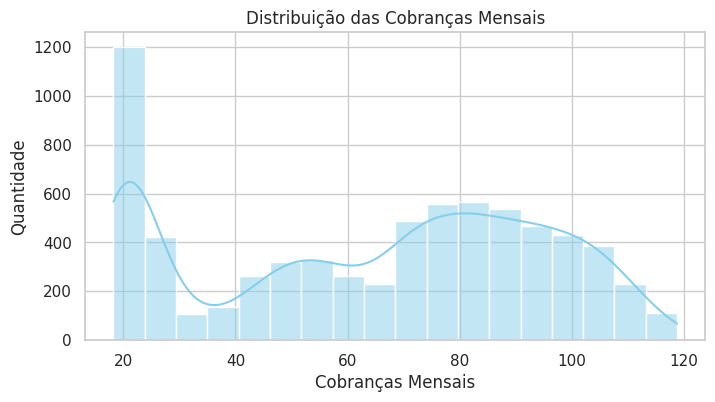

In [7]:
# Plotando a distribuição da variável 'MonthlyCharges'
plt.figure(figsize=(8, 4))
sns.histplot(df['MonthlyCharges'], kde=True, color='skyblue')
plt.title('Distribuição das Cobranças Mensais')
plt.xlabel('Cobranças Mensais')
plt.ylabel('Quantidade')
plt.show()

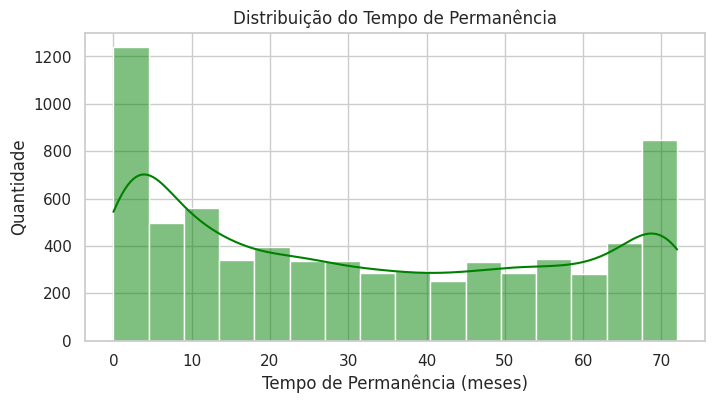

In [8]:
# Plotando a distribuição da variável 'tenure'
plt.figure(figsize=(8, 4))
sns.histplot(df['tenure'], kde=True, color='green')
plt.title('Distribuição do Tempo de Permanência')
plt.xlabel('Tempo de Permanência (meses)')
plt.ylabel('Quantidade')
plt.show()

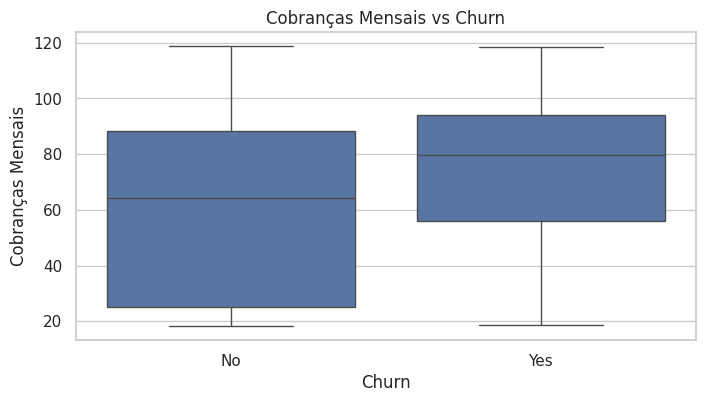

In [9]:
# Visualizando a relação entre 'MonthlyCharges' e 'Churn'
plt.figure(figsize=(8, 4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Cobranças Mensais vs Churn')
plt.xlabel('Churn')
plt.ylabel('Cobranças Mensais')
plt.show()

TotalCharges é convertido para numérico, pois, apesar de representar valores monetários, pode ter sido interpretado como texto. Usamos errors='coerce' para transformar erros (como strings vazias) em NaN e dropna() para remover quaisquer linhas com valores nulos resultantes dessa conversão, garantindo a integridade dos dados para a análise.

In [4]:
# Convertendo "TotalCharges" para numérico e lidando com nulos
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Preparação dos Dados

Aqui, separamos as variáveis independentes (X) e a variável dependente (y). A variável customerID é removida pois não contém informações preditivas. A variável Churn é mapeada para valores binários (1 para "Yes" e 0 para "No"), facilitando a modelagem estatística e a aplicação de algoritmos de classificação.

In [5]:
# Preparando variáveis independentes (X) e dependente (y)
X = df.drop(columns=['Churn', 'customerID'])
y = df['Churn'].map({'Yes': 1, 'No': 0})

# Pré-processamento dos Dados

Neste passo, normalizamos as variáveis numéricas com StandardScaler para ter média 0 e desvio padrão 1, importante para algoritmos baseados em gradiente, como redes neurais, pois ajuda na convergência. Variáveis categóricas são transformadas em variáveis dummy com OneHotEncoder, permitindo que o modelo trate cada categoria como uma feature separada.

In [6]:
# Transformando variáveis categóricas com OneHotEncoder e normalizando variáveis numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['tenure', 'MonthlyCharges', 'TotalCharges']),
        ('cat', OneHotEncoder(), ['PhoneService', 'Contract', 'PaperlessBilling', 'PaymentMethod'])
    ])

# Pipeline para Pré-processamento e Modelo

Utilizamos um Pipeline para sequenciar o pré-processamento e a aplicação do modelo de forma limpa e eficaz. O MLPClassifier é uma rede neural multicamada, aqui com 3 camadas ocultas de tamanhos 100, 50 e 20, respectivamente. A função de ativação logistic (sigmóide) é usada para a saída, ideal para classificação binária, transformando a saída do modelo em uma probabilidade entre 0 e 1.

In [7]:
# Pipeline para preprocessamento e modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(hidden_layer_sizes=(100, 50, 20), activation='logistic', max_iter=300))
])

# Divisão dos Dados em Treino e Teste

Aqui, dividimos os dados em conjuntos de treinamento e teste usando train_test_split. Isso é crucial para avaliar a capacidade do modelo de generalizar para dados não vistos, prevenindo o overfitting.

In [8]:
# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape y_test: {y_test.shape}")

Shape X_train: (5624, 7)
Shape y_train: (5624,)
Shape X_test: (1407, 7)
Shape y_test: (1407,)


#Treinamento do Modelo

O método fit treina o modelo no conjunto de dados de treino. Graças ao pipeline, o pré-processamento e o treinamento são realizados em uma única chamada, simplificando o fluxo de trabalho.

In [9]:
# Treinamento do modelo
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges']),
                                                 ('cat', OneHotEncoder(),
                                                  ['PhoneService', 'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('classifier',
                 MLPClassifier(activation='logistic',
                               hidden_layer_sizes=(100, 50, 20),
                               max_iter=300))])

#Avaliação do Modelo

Após o treinamento, fazemos previsões no conjunto de teste e utilizamos classification_report para obter métricas de avaliação, incluindo precisão, recall e F1-score para cada classe. Isso nos fornece uma visão abrangente da performance do modelo.

Precisão mede a proporção de identificações positivas que estavam corretas.
Recall avalia a proporção de positivos reais que foram identificados corretamente.
F1-score é uma medida harmônica entre precisão e recall, útil quando as classes são desbalanceadas.
Cada uma dessas métricas nos dá insights sobre diferentes aspectos da performance do modelo em um problema de classificação binária, permitindo-nos ajustar o modelo ou o pré-processamento conforme necessário para melhorar os resultados.

In [10]:
# Previsão e avaliação do modelo
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.87      1014
           1       0.70      0.46      0.55       393

    accuracy                           0.79      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



#Curva ROC e AUC
A curva ROC (Receiver Operating Characteristic) e a métrica AUC (Area Under the Curve) são utilizadas para avaliar o desempenho do modelo de classificação. A curva ROC mostra a relação entre a taxa de verdadeiros positivos e a taxa de falsos positivos em diferentes limiares de classificação. A AUC, por sua vez, quantifica a área sob a curva ROC, fornecendo uma medida de quão bem o modelo é capaz de distinguir entre as classes.

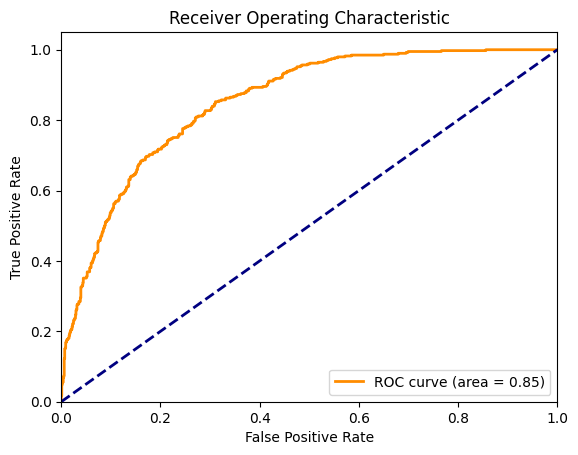

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular a probabilidade das previsões
y_pred_probs = pipeline.predict_proba(X_test)[:, 1]

# Calcular a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#Matriz de Confusão
A matriz de confusão é uma ferramenta poderosa para avaliar visualmente o desempenho do modelo de classificação, mostrando as contagens de verdadeiros positivos, falsos positivos, verdadeiros negativos e falsos negativos.

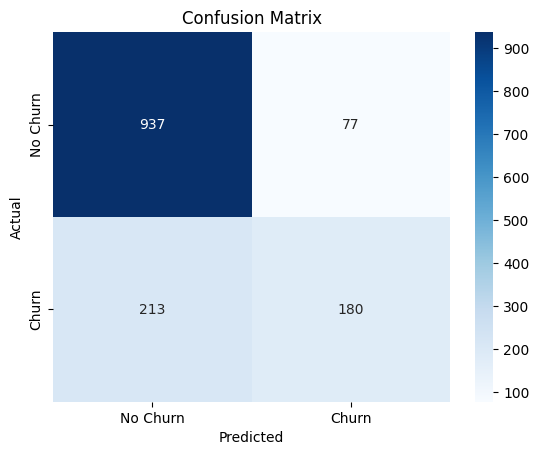

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Obter as previsões binárias
y_pred = pipeline.predict(X_test)

# Calcular a matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()